In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/workspaces/machine-learning-python-template-ds-2023/Ricardo/Advertising_Data.csv')

data.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [3]:
print(data.isnull().sum())

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_plot(dataframe):
    x = 'Product_Sold'
    for column in dataframe.columns:
        if column != x:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=x, y=column, data=dataframe)
            sns.regplot(x=x, y=column, data=dataframe, scatter=False, color='red')
            plt.xlabel(x)
            plt.ylabel(column)
            plt.title(f"Scatterplot of {column} vs {x} with Trendline")
            plt.show()


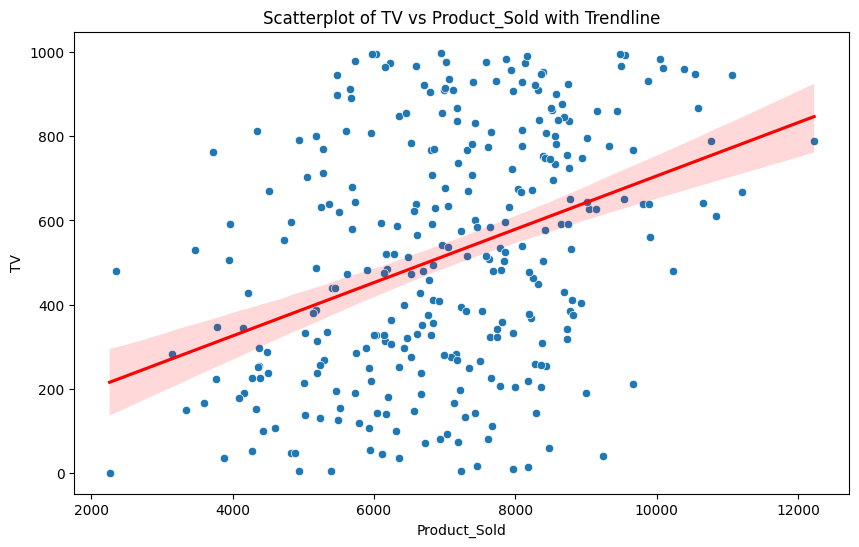

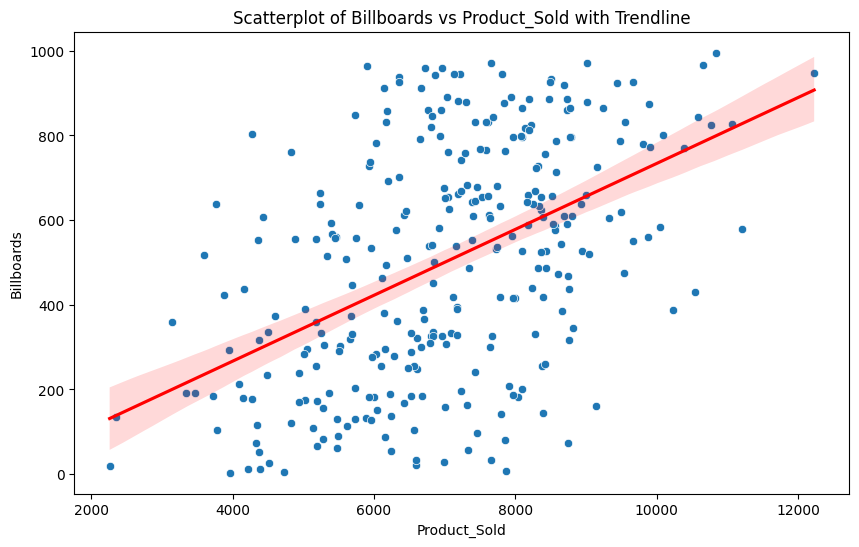

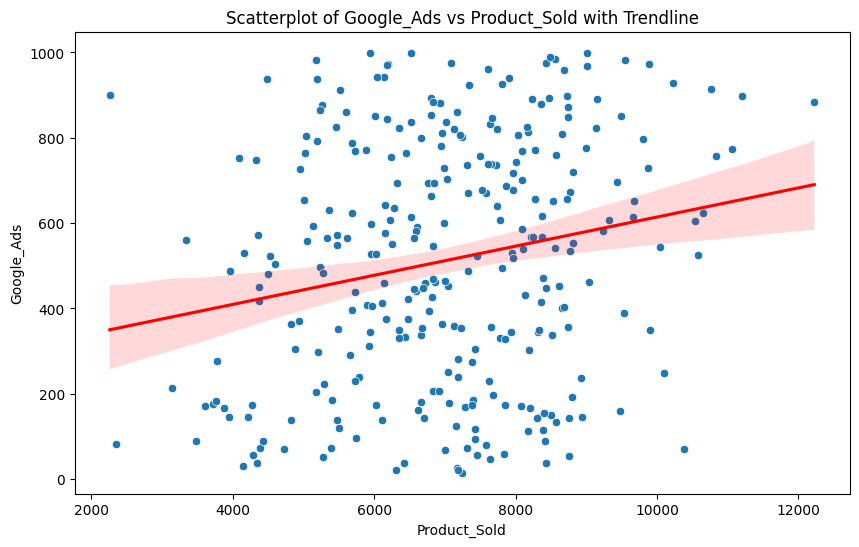

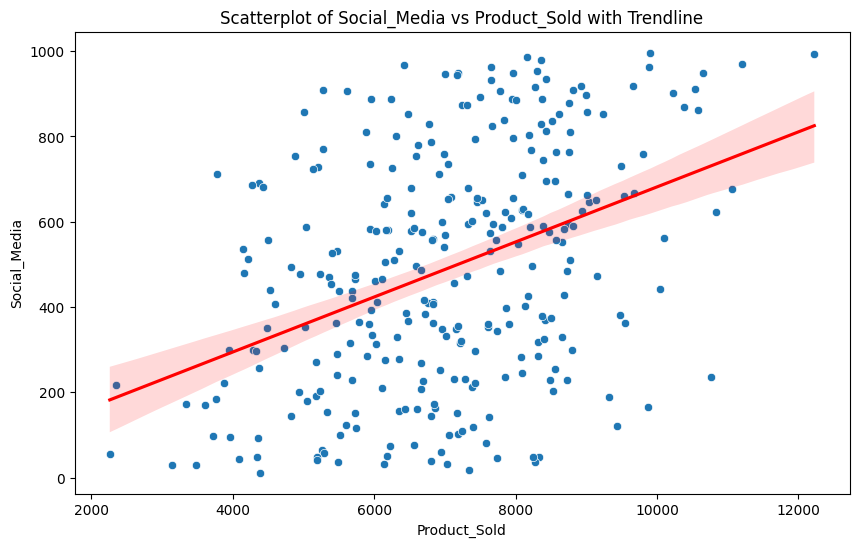

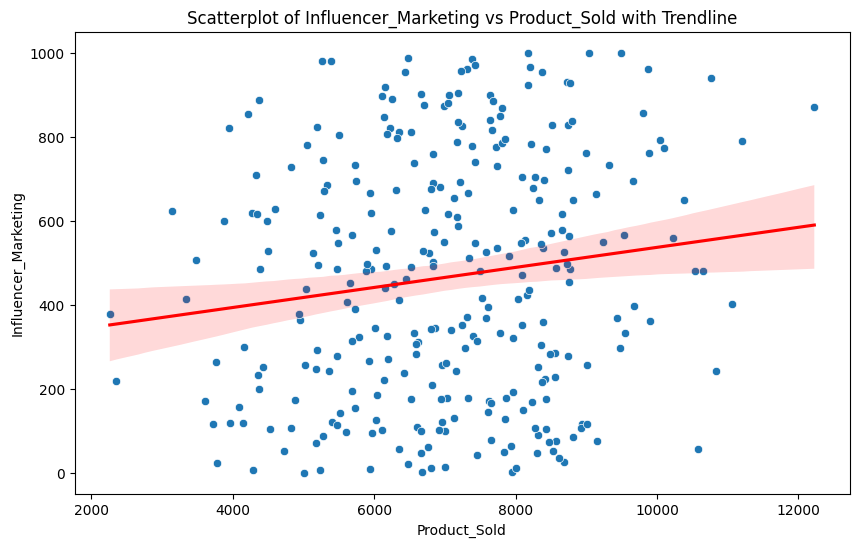

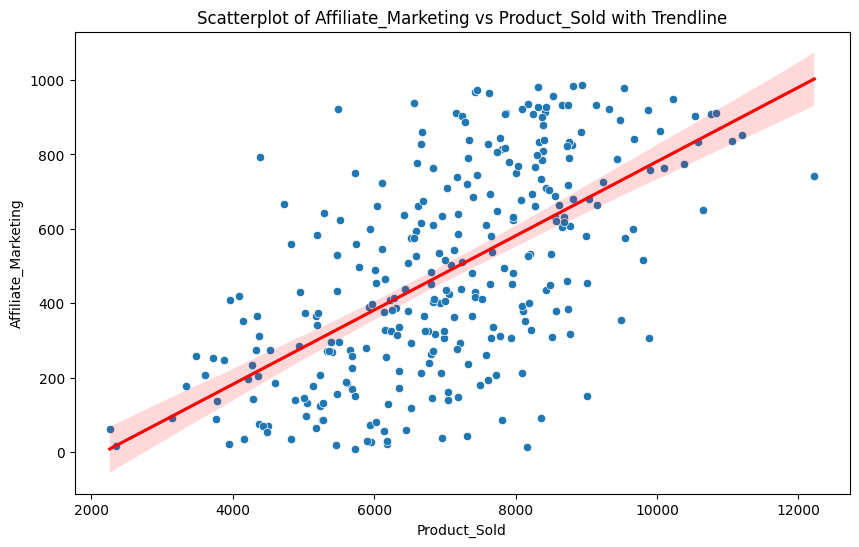

In [17]:
create_plot(data)

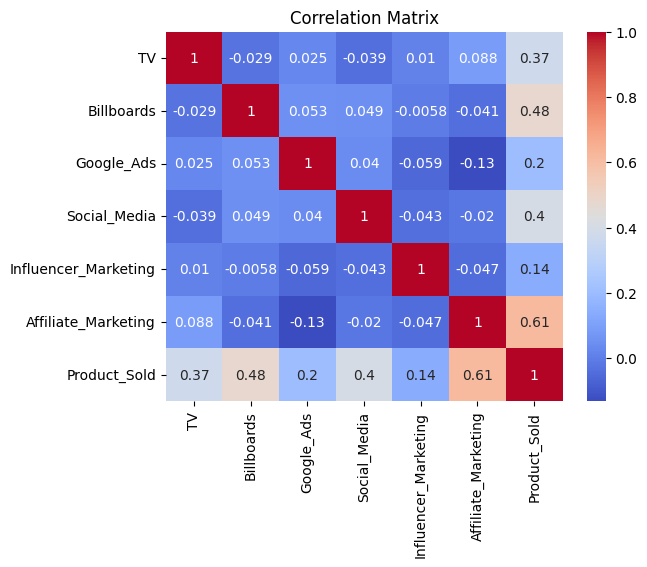

In [19]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [20]:
x = data.drop(['Product_Sold'], axis=1)
y = data['Product_Sold']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)

print(model.score(x_test, y_test))

0.9999736866138691


In [26]:
import pickle

filename = 'Advertising_model.sav'

pickle.dump(model, open(filename, 'wb'))

In [27]:
pip install Flask

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 5.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
from flask import Flask, request, jsonify
import pickle

# Load the trained model
model = pickle.load(open('Advertising_model.sav', 'rb'))

# Create a Flask application
app = Flask(__name__)

# Define a route to handle predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get the input data from the request
    data = request.get_json()

    # Perform prediction using the loaded model
    prediction = model.predict([data['input']])

    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction.tolist()})

# Run the Flask application
if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [19/Dec/2023 17:54:17] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [19/Dec/2023 17:54:17] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [19/Dec/2023 17:54:27] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [19/Dec/2023 17:55:06] "GET / HTTP/1.1" 404 -
Bad pipe message: %s [b'ge/svg+xml, image/*, */*; q=0.8\r\nHost: localhost:45861\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64', b'AppleWebKit/537.36 (KHTML, like Gecko) C']
Bad pipe message: %s [b'ome/120.0.0.0 Safari/537.36\r\nAccept-Encoding: gzip, deflate, br\r\nAccept-Language: en-US, en; q=0.9, es;']
Bad pipe message: %s [b'=0.8\r\nReferer: https://scaling-', b'legram-9vqxpxjg7x5c977p-45861.app.github.dev/\r\ntraceparent: 00-b1ee6d1a111899f322fd867b8027d4a2-80fcc470a83f4cab-00', b'X-Request-ID']
Bad pipe message: %s [b'b2420fe060ef44bbb0467dc7a868626e\r\nX-Real-IP: 10.240.0.69\r']
Bad pipe message: %s [b'-Forwarde']
Bad pipe message: %s [b'Proto: https\r\nX-Forwarded-

Bad pipe message: %s [b' q=0.9, image/avif, image/webp, image/apng, */*; q=0.8, application/signed-exchange; v=b3; q=0.7\r\nHost: loc', b'host:45861\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, lik']
Bad pipe message: %s [b'Gecko) Chrome/120.0.0.0 Safari/537.36\r\nAccept-Encoding: gzip, deflate, br\r\nAccept-Language: en-US, e']
Bad pipe message: %s [b' q=0.9, es; q=0.8\r\nReferer: https://scaling-telegram-9vqxpxjg7x5c977p.github.dev/\r\ntraceparent: 00-1310617f1d', b'dc9e798301f1c4b7072f-a8bc0407b8def42c-00\r\nX-Request-ID: 258834c9305320368a130b0d205c9904\r\nX-Real-I']
Bad pipe message: %s [b' 10.240.2.146\r\nX-Forwarded-Proto: https\r\nX-Forwarded-Host: scaling-telegram-9vq']
Bad pipe message: %s [b'xjg7x5c977p-45861.app.github.dev\r\nX-Forwarded-Port: 443\r\nX-Forwarded-Scheme: https\r\nX-Original-URI: /\r\nX-Scheme: https\r']
Bad pipe message: %s [b'roxy-Conn']
